# Initialize Simulation

In [1]:
from myAgent import CarlaAgent

In [2]:
myAgent = CarlaAgent()
myAgent.spawn_vehicle()
myAgent.attach_camera()
myAgent.attach_cameraS()
# myAgent.autopilot(20)
myAgent.attach_controller()
print("deployed")

Establishing Connection to Server
created vehicle.tesla.model3
created sensor.camera.rgb
created sensor.camera.semantic_segmentation
deployed


In [3]:
myAgent.find_vehicle()

# DDRNet Segmentation Model

https://github.com/chenjun2hao/DDRNet.pytorch

In [4]:
from perception.tools.ddrnetSegmentation import DDRNet
import cv2
import matplotlib.pyplot as plt
import numpy as np

segmenter = DDRNet()

Segmentation Model Initialized!


## Segmentation Model on Carla Image

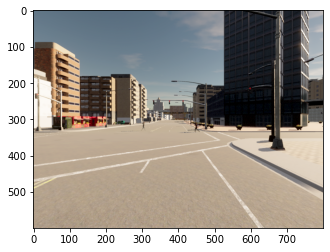

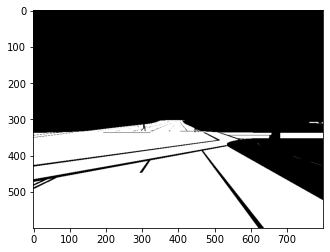

/home/mahsay/anaconda3/envs/agent0/lib/python3.7/site-packages/torch/nn/functional.py:3455: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


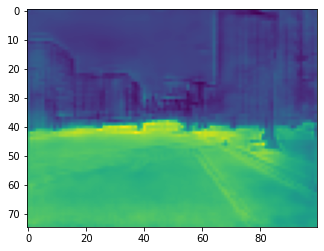

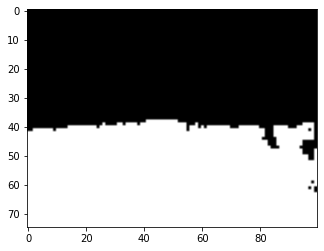

(<matplotlib.image.AxesImage at 0x7ff3903e9cd0>, None)

In [5]:
%matplotlib inline

# pull image from carla vehicle
road_class = 7

RGB = myAgent.image
sem = np.copy(myAgent.imageS[:,:,2])
sem[sem!=road_class] = 0
sem[sem==road_class] = 255

plt.imshow(cv2.cvtColor(RGB, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(sem, cmap=plt.cm.gray)
plt.show()


# feed to model
image = np.copy(RGB)


pred = segmenter.segments(image)
    
    

inferred = pred[0].cpu().detach().numpy()
inferred = inferred[0, :, :, :]
inferred = inferred.transpose((1, 2, 0))

class_frame = np.copy(inferred[:, :, 0])
plt.imshow(class_frame), plt.show()

threshold = 4
class_frame[class_frame<=threshold] = 0
class_frame[class_frame>threshold] = 1
plt.imshow(class_frame, cmap=plt.cm.gray), plt.show()

# Yolov5 Object Detection

In [6]:
from perception.tools.yoloDetector import Yolo
import cv2
import matplotlib.pyplot as plt

detector = Yolo()

Using torch 1.8.0 CUDA:0 (GeForce RTX 3090, 24260MB)



Fusing layers... 


Model Summary: 484 layers, 88922205 parameters, 0 gradients


Detector Model Initialized!


## Detection on Carla Image

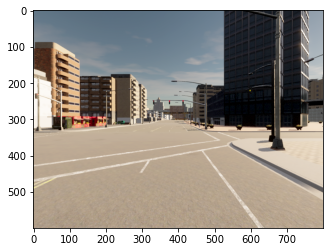

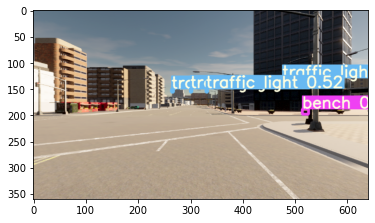

(<matplotlib.image.AxesImage at 0x7ff2a002cb90>, None)

In [7]:
%matplotlib inline

RGB = myAgent.image


plt.imshow(cv2.cvtColor(RGB, cv2.COLOR_BGR2RGB)), plt.show()

image = np.copy(RGB)

# feed to model
im_detect = detector.detect(image)
    
plt.imshow(cv2.cvtColor(im_detect, cv2.COLOR_BGR2RGB)), plt.show()

# Termination

In [8]:
myAgent.terminate()

destroying actors
terminated
